In [1]:
#Initial Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

import folium
from folium.plugins import HeatMap
import branca

C:\Users\josea\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Reading Dataset

# Population Census Data 2020
file_path = 'conjunto_de_datos_iter_00CSV20M.csv'
# Intentar leer con la codificación 'ISO-8859-1'
try:
    pop = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
    print("Archivo leído correctamente con codificación ISO-8859-1.")
except UnicodeDecodeError as e:
    print("Error de decodificación con ISO-8859-1:", e)
    
pop['NOM_ENT'] = pop['NOM_ENT'].apply(unidecode)

#Survey respondents' food consumption information
subus= pd.read_csv('subject_user.csv')
#Survey information
file_path = 'consumption_user.csv'
consump = pd.read_csv(file_path, dtype={78: str})
#List of coastal municipalities of the Gulf of California
Muni = pd.read_csv('LocCost.csv',encoding='ISO-8859-1')
#WWTP Information
plantas = pd.read_csv('plantasZECe.csv',encoding='ISO-8859-1')
#Nitrogen Removal Factor by Municipality
remu=pd.read_csv('nremun.csv')

#Population growth projections by age group

psonm = pd.read_csv("Sonhombres.csv")
psinm = pd.read_csv("Sinhombres.csv")
pbcm = pd.read_csv("BChombres.csv")
pbcsm = pd.read_csv("BCShombres.csv")
psonw = pd.read_csv("Sonmujeres.csv")
psinw = pd.read_csv("Sinmujeres.csv")
pbcw = pd.read_csv("BCmujeres.csv")
pbcsw = pd.read_csv("BCSmujeres.csv")


Archivo leído correctamente con codificación ISO-8859-1.


In [3]:
consump

,SUBJECT,ROUND,SURVEY_DAY,RESPONDER,SEASON,CONSUMPTION_DAY,CONSUMPTION_MONTH,CONSUMPTION_YEAR,WEEK_DAY,EXCEPTION_DAY,...,BCAROT_mcg,RETOL_mcg,VITD_mcg,VITE_mg,VITK_mcg,PHY_mg,N6_g,VITD_IU,PREP_METHOD,VERSION
0,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,5,NaN,0.00,0.03,0.53,NaN,0.00,0.00,"Raw / No further processed (e.g., bread, torti...",16-jun-21
1,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.00,0.80,0.00,NaN,0.00,0.00,"Raw / No further processed (e.g., bread, torti...",NaN
2,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,5,NaN,0.00,0.03,0.51,NaN,0.00,0.00,"Raw / No further processed (e.g., bread, torti...",NaN
3,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Boiled,NaN
4,1,1,1,3,NaN,NaN,4,2012,1,4.0,...,0,NaN,0.00,0.18,0.30,NaN,0.18,0.00,Boiled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337342,10685,1,1,1,NaN,NaN,3,2012,7,1.0,...,0,NaN,0.00,0.00,0.04,NaN,0.00,0.00,"Raw / No further processed (e.g., bread, torti...",NaN
337343,10685,1,1,1,NaN,NaN,3,2012,7,1.0,...,19,NaN,1.24,0.17,0.46,NaN,0.05,49.42,"Raw / No further processed (e.g., bread, torti...",NaN
337344,10685,1,1,1,NaN,NaN,3,2012,7,1.0,...,0,NaN,0.00,0.83,0.00,NaN,0.07,0.00,"Raw / No further processed (e.g., bread, torti...",NaN
337345,10685,1,1,1,NaN,NaN,3,2012,7,1.0,...,0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Boiled,NaN


In [3]:
# Remove accents from 'NOM_ENT' and 'NOM_MUN'
pop['NOM_ENT'] = pop['NOM_ENT'].apply(unidecode)


In [4]:
#Creating Mapping Dictionaries
# Create a dictionary to map the IDs of municipalities and states to work with them more efficiently, instead of using names, and to avoid issues due to inconsistencies in the names.
entidad_dict = pd.Series(pop['ENTIDAD'].values, index=pop['NOM_ENT']).to_dict()
mun_dict = pd.Series(pop['MUN'].values, index=pop['NOM_MUN']).to_dict()
subus['ENTIDAD'] = subus['ADM1_NAME'].map(entidad_dict)
subus['MUN'] = subus['ADM2_NAME'].map(mun_dict)


In [5]:
#Filter the survey subject list to only include the study area.
Munestados=subus[subus["ENTIDAD"].isin(pop["ENTIDAD"].unique())]
Muncosteros=Munestados[Munestados["MUN"].isin(pop["MUN"].unique())]
Muncosteros

,ADM0_NAME,ADM1_NAME,ADM2_NAME,WEIGHTING_FACTOR,AREA_TYPE,HOUSEHOLD,SUBJECT,ROUND,SEX,AGE_YEAR,...,PREG_LACT,BREASTFEEDING,UNOVERREP,ACTIVITY,S_W_ANTHRO,CODE_UPM,EST_VAR,VERSION,ENTIDAD,MUN
3,Mexico,Nuevo Leon,Santa Catarina,53716.3710,2,10152,4,1,2,41.0,...,1.0,NaN,NaN,NaN,3531.38890,M1946,195,NaN,19.0,31.0
4,Mexico,Nayarit,San Blas,1197.4623,1,6013,5,1,2,7.0,...,NaN,NaN,NaN,NaN,168.78960,M1817,182,NaN,18.0,12.0
5,Mexico,Baja California Sur,La Paz,4780.0273,2,7244,6,1,1,28.0,...,NaN,NaN,NaN,NaN,NaN,M0329,35,NaN,3.0,70.0
7,Mexico,Guerrero,Copala,16122.3030,2,10295,8,1,2,67.0,...,NaN,NaN,NaN,NaN,1862.08810,M1215,123,NaN,12.0,18.0
8,Mexico,Morelos,Cuernavaca,3625.0583,2,4312,9,1,2,18.0,...,1.0,NaN,NaN,NaN,691.14563,M1716,175,NaN,17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Mexico,Aguascalientes,Aguascalientes,1148.7856,2,7177,10679,1,1,4.0,...,NaN,NaN,NaN,NaN,337.14441,M0125,16,NaN,1.0,1.0
10679,Mexico,Tabasco,Huimanguillo,17138.8710,1,3452,10680,1,1,28.0,...,NaN,NaN,NaN,NaN,1209.78410,M2730,272,NaN,27.0,8.0
10680,Mexico,Yucatan,Baca,1214.7638,1,1881,10681,1,1,0.7,...,NaN,NaN,NaN,NaN,355.74341,M3102,311,NaN,31.0,4.0
10681,Mexico,Zacatecas,Vetagrande,2262.0493,1,7504,10682,1,2,4.0,...,NaN,NaN,NaN,NaN,485.33881,M3241,321,NaN,32.0,50.0


In [6]:
#Processing Consumption Data
# Filter: No exceptional diet the day of consumption
consumpf=consump[consump['EXCEPTION_DAY'] == 1]

#Filter the survey to only include subjects in the study area.
submuncos = set(Muncosteros['SUBJECT'])


consumuncost=consumpf[consumpf['SUBJECT'].isin(submuncos)]

subconsumuncost = set(consumuncost['SUBJECT'])

Muncosteros=Muncosteros[Muncosteros['SUBJECT'].isin(subconsumuncost)].copy()


In [7]:
# Group by 'SUBJECT' and 'SURVEY_DAY', then calculate the total protein consumption per day

average_protein = consumuncost.groupby(['SUBJECT', "SURVEY_DAY"])['PROTEIN_g'].sum().reset_index()

APS=average_protein.groupby(['SUBJECT'])['PROTEIN_g'].mean().reset_index()



# Create a dictionary mapping 'SUBJECT' to average 'PROTEIN_g'
protcon_dict = pd.Series(APS['PROTEIN_g'].values, index=APS['SUBJECT']).to_dict()

Muncosteros.loc[:, 'PROTEIN_g'] = Muncosteros['SUBJECT'].map(protcon_dict)

In [8]:
#Extract a subset of columns from 'Muncosteros' to create 'datap', a DataFrame focused on demographic and nutritional information. 
datap=Muncosteros.loc[:,['SUBJECT','ADM1_NAME','ENTIDAD', 'ADM2_NAME','MUN','SEX', 'AGE_YEAR','WEIGHT', 'HEIGHT','PROTEIN_g']].copy()

In [9]:
datap

,SUBJECT,ADM1_NAME,ENTIDAD,ADM2_NAME,MUN,SEX,AGE_YEAR,WEIGHT,HEIGHT,PROTEIN_g
3,4,Nuevo Leon,19.0,Santa Catarina,31.0,2,41.0,71.0,161.5,72.70
4,5,Nayarit,18.0,San Blas,12.0,2,7.0,26.4,127.0,53.10
7,8,Guerrero,12.0,Copala,18.0,2,67.0,80.6,152.0,47.40
8,9,Morelos,17.0,Cuernavaca,7.0,2,18.0,71.0,148.5,41.80
9,10,Baja California,2.0,Tijuana,4.0,2,4.0,15.7,100.8,36.20
...,...,...,...,...,...,...,...,...,...,...
10677,10678,Campeche,4.0,Campeche,2.0,1,87.0,63.9,152.5,47.00
10679,10680,Tabasco,27.0,Huimanguillo,8.0,1,28.0,92.6,171.0,67.10
10680,10681,Yucatan,31.0,Baca,4.0,1,0.7,9.6,70.0,15.05
10681,10682,Zacatecas,32.0,Vetagrande,50.0,2,4.0,15.7,102.9,34.30


[38.329197080291976, 58.663395225464186, 75.80989583333333, 75.74638554216867, 73.24535714285713, 59.45099502487562]


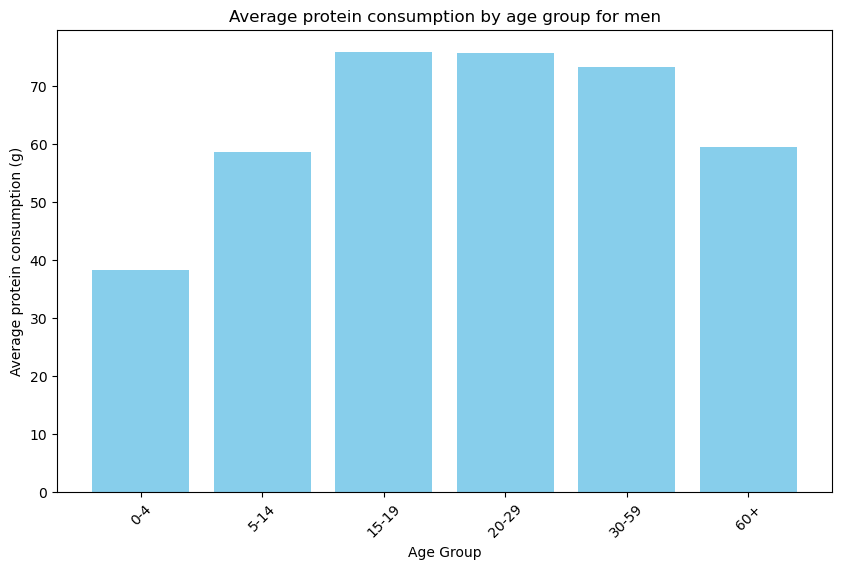

In [9]:
#Analyzing Protein Consumption by Age Group
df_hombres = datap[datap['SEX'] == 1]

df_hombres_0_4 = df_hombres[df_hombres['AGE_YEAR'].between(0, 4)]
df_hombres_5_14 = df_hombres[df_hombres['AGE_YEAR'].between(5, 14)]
df_hombres_15_19 = df_hombres[df_hombres['AGE_YEAR'].between(15, 19)]
df_hombres_20_29 = df_hombres[df_hombres['AGE_YEAR'].between(20, 29)]
df_hombres_30_59 = df_hombres[df_hombres['AGE_YEAR'].between(30, 59)]
df_hombres_mayor_60 = df_hombres[df_hombres['AGE_YEAR'] > 60]

mproconm=[df_hombres_0_4["PROTEIN_g"].mean(), df_hombres_5_14["PROTEIN_g"].mean(), df_hombres_15_19["PROTEIN_g"].mean(), df_hombres_20_29["PROTEIN_g"].mean(), df_hombres_30_59["PROTEIN_g"].mean(), df_hombres_mayor_60["PROTEIN_g"].mean()]
print(mproconm)

grupos_edad = ['0-4', '5-14', '15-19', '20-29', '30-59', '60+']

df_proteinas = pd.DataFrame({
    'Age Group': grupos_edad,
    'Average protein consumption (g)': mproconm
})


plt.figure(figsize=(10, 6))
plt.bar(df_proteinas['Age Group'], df_proteinas['Average protein consumption (g)'], color='skyblue')
plt.title('Average protein consumption by age group for men')
plt.xlabel('Age Group')
plt.ylabel('Average protein consumption (g)')
plt.xticks(rotation=45)
plt.show()

In [10]:
mproconm=[df_hombres_0_4["PROTEIN_g"].mean(), df_hombres_5_14["PROTEIN_g"].mean(), df_hombres_15_19["PROTEIN_g"].mean(), df_hombres_20_29["PROTEIN_g"].mean(), df_hombres_30_59["PROTEIN_g"].mean(), df_hombres_mayor_60["PROTEIN_g"].mean()]
print(mproconm)

[38.329197080291976, 58.663395225464186, 75.80989583333333, 75.74638554216867, 73.24535714285713, 59.45099502487562]


[35.94330783938814, 54.595420974889215, 54.42092592592592, 55.49380165289257, 57.399868766404204, 43.65040322580645]


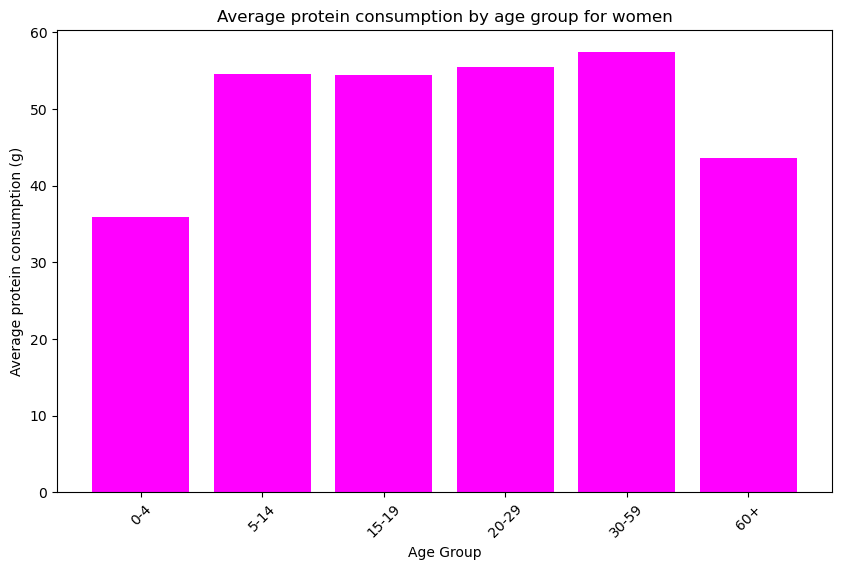

In [11]:
df_mujeres = datap[datap['SEX'] == 2]

df_mujeres_0_4 = df_mujeres[df_mujeres['AGE_YEAR'].between(0, 4)]
df_mujeres_5_14 = df_mujeres[df_mujeres['AGE_YEAR'].between(5, 14)]
df_mujeres_15_19 = df_mujeres[df_mujeres['AGE_YEAR'].between(15, 19)]
df_mujeres_20_29 = df_mujeres[df_mujeres['AGE_YEAR'].between(20, 29)]
df_mujeres_30_59 = df_mujeres[df_mujeres['AGE_YEAR'].between(30, 59)]
df_mujeres_mayor_60 = df_mujeres[df_mujeres['AGE_YEAR'] > 60]

mproconw=[df_mujeres_0_4["PROTEIN_g"].mean(), df_mujeres_5_14["PROTEIN_g"].mean(), df_mujeres_15_19["PROTEIN_g"].mean(), df_mujeres_20_29["PROTEIN_g"].mean(), df_mujeres_30_59["PROTEIN_g"].mean(), df_mujeres_mayor_60["PROTEIN_g"].mean()]
print(mproconw)

df_proteinas = pd.DataFrame({
    'Age Group': grupos_edad,
    'Average protein consumption (g)': mproconw
})


plt.figure(figsize=(10, 6))
plt.bar(df_proteinas['Age Group'], df_proteinas['Average protein consumption (g)'], color='magenta')
plt.title('Average protein consumption by age group for women')
plt.xlabel('Age Group')
plt.ylabel('Average protein consumption (g)')
plt.xticks(rotation=45)
plt.show()

In [12]:
Muni

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD
0,2,Baja California,1,Ensenada,278,Agua Caliente,-115.135552,30.671656
1,2,Baja California,1,Ensenada,280,Alfonsinas,-114.396719,29.801797
2,2,Baja California,1,Ensenada,408,El Coloradito [Campo],-114.669038,30.579632
3,2,Baja California,1,Ensenada,491,Ejido Francisco R. Serrano (Valle San MatåÕas),-115.543582,31.329491
4,2,Baja California,1,Ensenada,512,El Huerfanito [Campo],-114.631184,30.123629
...,...,...,...,...,...,...,...,...
10359,26,Sonora,55,San Luis RÌÄåÎ?o Colorado,17,Ingeniero Luis B. SÌÄåÎÌÄånchez,-114.996173,32.199549
10360,26,Sonora,71,Benito JuÌÄåÎÌÄårez,1,Villa JuÌÄåÎÌÄårez,-109.842573,27.127810
10361,26,Sonora,71,Benito JuÌÄåÎÌÄårez,139,ParedÌÄåÎ?n Colorado (ParedÌÄåÎ?n Viejo),-109.932683,27.078218
10362,26,Sonora,72,San Ignacio RÌÄåÎ?o Muerto,1,San Ignacio RÌÄåÎ?o Muerto,-110.241514,27.411415


In [13]:
#Filter the population data for the study area only.
Datos = pop[pop["ENTIDAD"].isin([2,3,25,26])]
INEGIZE = pd.DataFrame(columns=pop.columns)
frames_temporales = []
for entidad in Muni['ENTIDAD'].unique():
    bb = Muni[Muni["ENTIDAD"] == entidad]
    dd1 = pop[pop["ENTIDAD"].isin(bb["ENTIDAD"].unique())]    
    for Mun in bb["MUN"].unique():
        c = bb[bb["MUN"] == Mun]
        dd2 = dd1[dd1["MUN"].isin(c["MUN"].unique())]  
        for Loc in c['LOC'].unique():
            cc2 = c[c['LOC'] == Loc]
            dd3 = dd2[dd2['LOC'].isin(cc2['LOC'].unique())] 
            frames_temporales.append(dd3)

INEGIZE = pd.concat(frames_temporales, ignore_index=True)

In [14]:
##Filtering on rural (<1000) and urban localities (>1000)
datapbt=INEGIZE[INEGIZE["TAMLOC"].between(5, 15)]
datapbt.iloc[:, 9:] = datapbt.iloc[:, 9:].astype(float).astype(int)
dataps=INEGIZE[INEGIZE["TAMLOC"].between(0, 4)]
required_columns = [
    'ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 
    'LONGITUD', 'LATITUD', 'ALTITUD', 'TAMLOC','POBTOT', 'POBFEM', 'POBMAS','P_0A4','P_0A4_F','P_0A4_M'
]
datapb = datapbt[required_columns].copy()

pop["TAMLOC"].astype(int)
df_filtrado2 = pop[pop["TAMLOC"].between(5, 15)]

In [15]:
dataps["POBTOT"]

0          3
1          2
2          4
3        274
4          1
        ... 
10357      2
10358      5
10359      2
10360      2
10361      1
Name: POBTOT, Length: 10231, dtype: int64

In [16]:
#Total population
datapb["POBTOT"].sum()+dataps["POBTOT"].sum()

6422383

In [17]:
#Adding Age Group Population Data
datapb['P_5A14_F']=datapbt['P_5A9_F']+datapbt['P_10A14_F']
datapb['P_5A14_M']=datapbt['P_5A9_M']+datapbt['P_10A14_M']
datapb['P_15A19_F']=datapbt['P_15A19_F']
datapb['P_15A19_M']=datapbt['P_15A19_M']
datapb['P_20A29_F']=datapbt['P_20A24_F']+datapbt['P_25A29_F']
datapb['P_20A29_M']=datapbt['P_20A24_M']+datapbt['P_25A29_M']
datapbt.loc[:, 'P_55A59_M'] = datapbt['P_55A59'].astype(int) - datapbt['P_55A59_F'].astype(int)
datapb['P_30A59_F']=datapbt['P_30A34_F']+datapbt['P_35A39_F']+datapbt['P_40A44_F']+datapbt['P_45A49_F']+datapbt['P_50A54_F']+datapbt['P_55A59_F']
datapb['P_30A59_M']=datapbt['P_30A34_M']+datapbt['P_35A39_M']+datapbt['P_40A44_M']+datapbt['P_45A49_M']+datapbt['P_50A54_M']+datapbt['P_55A59_M']
datapb['P_60YMAS_M']=datapbt['P_60YMAS_M']
datapb['P_60YMAS_F']=datapbt['P_60YMAS_F']

datapbp=datapb.copy()



In [18]:
#Protein to Nitrogen conversion factor
Proto=0.16
#Percentage of nitrogen reaching water bodies for rural communities
Rs=1
#Percentage of nitrogen reaching water bodies for urban localities
Rb=.45

#Estimation of nitrogen discharge for rural communities
dataps["Nkgpy"]=datap["PROTEIN_g"].mean()*.365*.16*dataps["POBTOT"]

#Estimation of nitrogen discharge for urban localities
datapb["Nkgpy"]=.365*Proto*Rb*(datapb["P_0A4_M"]*mproconm[0]+datapb["P_0A4_F"]*mproconw[0]+datapb["P_5A14_M"]*mproconm[1]+datapb["P_5A14_F"]*mproconw[1]+datapb["P_15A19_M"]*mproconm[2]+datapb["P_15A19_F"]*mproconw[2]+datapb["P_20A29_M"]*mproconm[3]+datapb["P_20A29_F"]*mproconw[3]+datapb["P_30A59_M"]*mproconm[4]+datapb["P_30A59_F"]*mproconw[4]+datapb["P_60YMAS_M"]*mproconm[5]++datapb["P_60YMAS_F"]*mproconw[5])

#Integration of the information into a single DataFrame
df1=datapb[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]

df2=dataps[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]
TotalAnualN = pd.concat([df1, df2], ignore_index=True)

print("Average annual nitrogen discharge: " + f'{TotalAnualN["Nkgpy"].sum()/1000:.2f}'+ " Ton/y")



Average annual nitrogen discharge: 11394.57 Ton/y


C:\Users\josea\AppData\Local\Temp\ipykernel_12644\1985733039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataps["Nkgpy"]=datap["PROTEIN_g"].mean()*.365*.16*dataps["POBTOT"]


In [19]:
#Estimation with dynamic removal factors

datapb2 = pd.DataFrame(columns=datapb.columns)
frames_temporales = []
Proto=0.16
Rs=1

for entidad in datapb['ENTIDAD'].unique():
    
    bb = datapb[datapb["ENTIDAD"] == entidad]
    ee = remu[remu["idest"] == entidad]
    
    for Mun in bb["MUN"].unique():
        datam = bb[bb["MUN"] == Mun]
        Rb=1- ee.loc[ee['IDMun'] == Mun, 'NRE'].values[0]
      
        datam["Nkgpy"]=.365*Proto*Rb*(datam["P_0A4_M"]*mproconm[0]+datam["P_0A4_F"]*mproconw[0]+datam["P_5A14_M"]*mproconm[1]+datam["P_5A14_F"]*mproconw[1]+datam["P_15A19_M"]*mproconm[2]+datam["P_15A19_F"]*mproconw[2]+datam["P_20A29_M"]*mproconm[3]+datam["P_20A29_F"]*mproconw[3]+datam["P_30A59_M"]*mproconm[4]+datam["P_30A59_F"]*mproconw[4]+datam["P_60YMAS_M"]*mproconm[5]++datam["P_60YMAS_F"]*mproconw[5])
        frames_temporales.append(datam)

datapb2 = pd.concat(frames_temporales, ignore_index=True)

#Integration of the information into a single DataFrame
df1=datapb2[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]



df2=dataps[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]
TotalAnualN2 = pd.concat([df1, df2], ignore_index=True)

print("Average annual nitrogen discharge: " + f'{TotalAnualN2["Nkgpy"].sum()/1000:.2f}'+ " Ton/y")

Average annual nitrogen discharge: 11384.28 Ton/y


C:\Users\josea\AppData\Local\Temp\ipykernel_12644\3686241348.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datam["Nkgpy"]=.365*Proto*Rb*(datam["P_0A4_M"]*mproconm[0]+datam["P_0A4_F"]*mproconw[0]+datam["P_5A14_M"]*mproconm[1]+datam["P_5A14_F"]*mproconw[1]+datam["P_15A19_M"]*mproconm[2]+datam["P_15A19_F"]*mproconw[2]+datam["P_20A29_M"]*mproconm[3]+datam["P_20A29_F"]*mproconw[3]+datam["P_30A59_M"]*mproconm[4]+datam["P_30A59_F"]*mproconw[4]+datam["P_60YMAS_M"]*mproconm[5]++datam["P_60YMAS_F"]*mproconw[5])


In [29]:
dataps.to_csv("rural.csv")

In [31]:
datapb2.to_csv("urb.csv")

In [20]:
remu

,Unnamed: 0,Municipio,idest,IDMun,NRE,Nptar
0,0,Ahome,25,1,0.604544,23
1,1,Angostura,25,2,0.647668,29
2,2,Benito Juárez,26,71,0.000000,0
3,3,Bácum,26,12,0.000000,0
4,4,Caborca,26,17,0.000000,0
5,5,Cajeme,26,18,0.600000,6
6,6,Concordia,25,4,0.518258,7
7,7,Culiacán,25,6,0.281757,99
8,8,Elota,25,8,0.715502,27
9,9,Empalme,26,25,0.600000,2


In [21]:
# Mapping Nitrogen effluents and WWTP

average_latitude = TotalAnualN['LATITUD'].mean()
average_longitude = TotalAnualN['LONGITUD'].mean()
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=5)

# Create a list of coordinates and values
heat_TotalAnualN = [[row['LATITUD'], row['LONGITUD'], row['Nkgpy']] for index, row in TotalAnualN.iterrows()]

# Add the heatmap layer
HeatMap(heat_TotalAnualN).add_to(map)

for _, row in plantas.iterrows():
        tooltip = f"{row['nom_ptar']} - {row['nom_loc']}"
        folium.Marker(
            location=[row['LATITUD'], row['LONGITUD']],
            popup=f"<i>Capacidad Instalada (m3/s): {row['cap_inst']}</i><br>"
                  f"<i>Caudal Tratado(m3/s): {row['caud_trat']}</i><br>"
                  f"<i>Tipo: {row['Proceso de tratamiento']}</i>",
            tooltip=tooltip
        ).add_to(map)

      

colormap = branca.colormap.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                                          index=[0, 300, 600 , 900],
                                          vmin=0,
                                          vmax=900,
                                          caption='T Nigrogeo Total')


map.add_child(colormap)        
        
        
        
        
# Save the map to an HTML file
map.save('heatmap2.html')


map 



In [22]:
(TotalAnualN.groupby('NOM_MUN')['Nkgpy'].sum()/1000).astype(float).round(2).sort_values()


NOM_MUN
Ensenada                     2.70
San Quintín                  2.96
Pitiquito                   16.27
San Ignacio Río Muerto      27.29
Loreto                      29.81
Mulegé                      37.04
Benito Juárez               42.58
San Ignacio                 47.75
Bácum                       48.79
Concordia                   49.45
Rosario                     55.45
Puerto Peñasco              99.71
Empalme                     99.85
Angostura                  109.83
Elota                      137.17
Etchojoa                   141.90
Caborca                    165.44
Huatabampo                 181.62
Guaymas                    278.54
Navolato                   329.29
San Luis Río Colorado      332.44
La Paz                     449.05
Los Cabos                  573.18
Guasave                    611.02
Cajeme                     734.96
Mazatlán                   831.52
Ahome                      852.74
Hermosillo                1531.42
Culiacán                  1766.15
Mexica

In [23]:
TotalAnualNP=TotalAnualN.copy()
TotalAnualNP.loc[TotalAnualNP["ENTIDAD"] == 2, "Nkgpy"] *= 1.26
TotalAnualNP.loc[TotalAnualNP["ENTIDAD"] == 3, "Nkgpy"] *= 1.39
TotalAnualNP.loc[TotalAnualNP["ENTIDAD"] == 25, "Nkgpy"] *= 1.10
TotalAnualNP.loc[TotalAnualNP["ENTIDAD"] == 26, "Nkgpy"] *= 1.15

TotalAnualNP["Nkgpy"].sum()/TotalAnualN["Nkgpy"].sum()

1.169433219257375

In [25]:
datapbp=datapb.copy()


datapbp.loc[datapbp["ENTIDAD"] == 26, "Nkgpy"] = (
    0.365 * Proto * Rb * (
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_0A4_M"] *mproconm[0]) * psonm.iloc[30, 1] + 
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_0A4_F"] * mproconw[0]) * psonw.iloc[30, 1] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_5A14_M"] * mproconm[1]) * psonm.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_5A14_F"] * mproconw[1]) * psonw.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_15A19_M"] * mproconm[2]) * psonm.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_15A19_F"] * mproconw[2]) * psonw.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_20A29_M"] * mproconm[3]) * psonm.iloc[30, 4] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_20A29_F"] * mproconw[3]) * psonw.iloc[30, 4]+
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_30A59_M"] * mproconm[4]) * psonm.iloc[30, 5] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_30A59_F"] * mproconw[4]) * psonw.iloc[30, 5]+
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_60YMAS_M"] * mproconm[5]) * psonm.iloc[30, 6] +
        (datapbp.loc[datapbp["ENTIDAD"] == 26, "P_60YMAS_F"] * mproconw[5]) * psonw.iloc[30, 6]
    )
)


datapbp.loc[datapbp["ENTIDAD"] == 25, "Nkgpy"] = (
    0.365 * Proto * Rb * (
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_0A4_M"] *mproconm[0]) * psinm.iloc[30, 1] + 
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_0A4_F"] * mproconw[0]) * psinw.iloc[30, 1] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_5A14_M"] * mproconm[1]) * psinm.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_5A14_F"] * mproconw[1]) * psinw.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_15A19_M"] * mproconm[2]) * psinm.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_15A19_F"] * mproconw[2]) * psinw.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_20A29_M"] * mproconm[3]) * psinm.iloc[30, 4] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_20A29_F"] * mproconw[3]) * psinw.iloc[30, 4]+
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_30A59_M"] * mproconm[4]) * psinm.iloc[30, 5] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_30A59_F"] * mproconw[4]) * psinw.iloc[30, 5]+
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_60YMAS_M"] * mproconm[5]) * psinm.iloc[30, 6] +
        (datapbp.loc[datapbp["ENTIDAD"] == 25, "P_60YMAS_F"] * mproconw[5]) * psinw.iloc[30, 6]
    )
)


datapbp.loc[datapbp["ENTIDAD"] == 2, "Nkgpy"] = (
    0.365 * Proto * Rb * (
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_0A4_M"] *mproconm[0]) * pbcm.iloc[30, 1] + 
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_0A4_F"] * mproconw[0]) * pbcw.iloc[30, 1] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_5A14_M"] * mproconm[1]) * pbcm.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_5A14_F"] * mproconw[1]) * pbcw.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_15A19_M"] * mproconm[2]) * pbcm.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_15A19_F"] * mproconw[2]) * pbcw.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_20A29_M"] * mproconm[3]) * pbcm.iloc[30, 4] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_20A29_F"] * mproconw[3]) * pbcw.iloc[30, 4]+
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_30A59_M"] * mproconm[4]) * pbcm.iloc[30, 5] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_30A59_F"] * mproconw[4]) * pbcw.iloc[30, 5]+
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_60YMAS_M"] * mproconm[5]) * pbcm.iloc[30, 6] +
        (datapbp.loc[datapbp["ENTIDAD"] == 2, "P_60YMAS_F"] * mproconw[5]) * pbcw.iloc[30, 6]
    )
)



datapbp.loc[datapbp["ENTIDAD"] == 3, "Nkgpy"] = (
    0.365 * Proto * Rb * (
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_0A4_M"] *mproconm[0]) * pbcsm.iloc[30, 1] + 
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_0A4_F"] * mproconw[0]) * pbcsw.iloc[30, 1] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_5A14_M"] * mproconm[1]) * pbcsm.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_5A14_F"] * mproconw[1]) * pbcsw.iloc[30, 2] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_15A19_M"] * mproconm[2]) * pbcsm.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_15A19_F"] * mproconw[2]) * pbcsw.iloc[30, 3] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_20A29_M"] * mproconm[3]) * pbcsm.iloc[30, 4] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_20A29_F"] * mproconw[3]) * pbcsw.iloc[30, 4]+
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_30A59_M"] * mproconm[4]) * pbcsm.iloc[30, 5] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_30A59_F"] * mproconw[4]) * pbcsw.iloc[30, 5]+
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_60YMAS_M"] * mproconm[5]) * pbcsm.iloc[30, 6] +
        (datapbp.loc[datapbp["ENTIDAD"] == 3, "P_60YMAS_F"] * mproconw[5]) * pbcsw.iloc[30, 6]
    )
)


datapsp=dataps.copy()
datapsp.loc[datapsp["ENTIDAD"] == 2, "Nkgpy"] *= 1.26
datapsp.loc[datapsp["ENTIDAD"] == 3, "Nkgpy"] *= 1.39
datapsp.loc[datapsp["ENTIDAD"] == 25, "Nkgpy"] *= 1.10
datapsp.loc[datapsp["ENTIDAD"] == 26, "Nkgpy"] *= 1.15



#Integration of the information into a single DataFrame
df1p=datapbp[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]

df2p=datapsp[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD',"Nkgpy"]]
TotalAnualNP2050 = pd.concat([df1p, df2p], ignore_index=True)

#datapbp["Nkgpy"]=.365*Proto*Rb*(datapb["P_0A4_M"]*mproconm[0]*psonm.iloc[50, 1]+psonw.iloc[50, 1]*datapb["P_0A4_F"]*mproconw[0]+psonm.iloc[50, 2]*datapb["P_5A14_M"]*mproconm[1]+psonw.iloc[50, 2]*datapb["P_5A14_F"]*mproconw[1]+psonm.iloc[50, 3]*datapb["P_15A19_M"]*mproconm[2]+psonw.iloc[50, 3]*datapb["P_15A19_F"]*mproconw[2]+psonm.iloc[50, 4]*datapb["P_20A29_M"]*mproconm[3]+psonw.iloc[50, 4]*datapb["P_20A29_F"]*mproconw[3]+datapb["P_30A59_M"]*mproconm[4]+datapb["P_30A59_F"]*mproconw[4]+datapb["P_60YMAS_M"]*mproconm[5]++datapb["P_60YMAS_F"]*mproconw[5])

In [26]:
len(datapbp)

133

In [27]:
TotalAnualN['Nkgpy'].sum()

11394572.97959393

In [ ]:
TotalAnualN21

In [28]:
print(f"Incremento: {((TotalAnualNP2050['Nkgpy'].sum() / TotalAnualN['Nkgpy'].sum()) - 1) * 100:.2f}%")

Incremento: 148.92%


In [29]:
datos_agrupados = TotalAnualN.groupby('NOM_MUN')['Nkgpy'].sum().sort_values(ascending=False)
datos_agrupadosp = TotalAnualN21.groupby('NOM_MUN')['Nkgpy'].sum().sort_values(ascending=False)
datos_agrupados=datos_agrupados/1000
datos_agrupadosp=datos_agrupadosp/1000

datos_agrupadosp.to_csv("Descargasurbanas.csv")

# Asumiendo que datos_agrupados y datos_agrupadosp son Series de pandas
municipios = datos_agrupados.index
indice = np.arange(len(municipios))

# Tamaño de las barras
ancho = 0.35

plt.figure(figsize=(10, 8))

# Crear las barras para datos_agrupados
plt.barh(indice - ancho/2, datos_agrupados, ancho, color='blue', label='TotalAnualN NOM-1996')

# Crear las barras para datos_agrupadosp
plt.barh(indice + ancho/2, datos_agrupados*.63, ancho, color='red', label='TotalAnual NOM-2021')

plt.xlabel('Total Anual de Nkgpy (en miles)')
plt.title('Total Anual de Nkgpy por Municipio')
plt.yticks(indice, municipios)
plt.ylabel('Municipio')
plt.legend()

plt.show()

NameError: name 'TotalAnualN21' is not defined

In [30]:
pbcsw.iloc[30, 6]

3.828435503602012

In [31]:



TotalAnualN["Pincre"]=TotalAnualNP2050["Nkgpy"]/TotalAnualN["Nkgpy"]

# Create a map centered around the average coordinates of the TotalAnualN
average_latitude = TotalAnualN['LATITUD'].mean()
average_longitude = TotalAnualN['LONGITUD'].mean()
map = folium.Map(location=[average_latitude, average_longitude], zoom_start=5)

# Create a list of coordinates and values
heat_TotalAnualN = [[row['LATITUD'], row['LONGITUD'], row["Pincre"]] for index, row in TotalAnualN.iterrows()]

# Add the heatmap layer
HeatMap(heat_TotalAnualN).add_to(map)

for _, row in plantas.iterrows():
        tooltip = f"{row['nom_ptar']} - {row['nom_loc']}"
        folium.Marker(
            location=[row['LATITUD'], row['LONGITUD']],
            popup=f"<i>Capacidad Instalada (m3/s): {row['cap_inst']}</i><br>"
                  f"<i>Caudal Tratado(m3/s): {row['caud_trat']}</i><br>"
                  f"<i>Tipo: {row['Proceso de tratamiento']}</i>",
            tooltip=tooltip
        ).add_to(map)

map

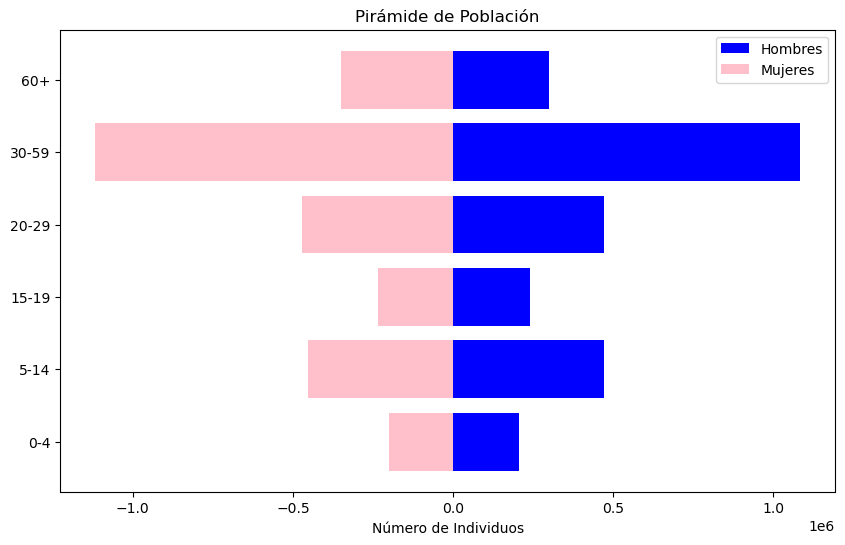

In [32]:

# Population Pyramid Construction


hombres_0_4 = datapb["P_0A4_M"].sum()
hombres_5_14 = datapb["P_5A14_M"].sum()
hombres_15_19 = datapb["P_15A19_M"].sum()
hombres_20_29 = datapb["P_20A29_M"].sum()
hombres_30_59 = datapb["P_30A59_M"].sum()
hombres_mayor_60 = datapb["P_60YMAS_M"].sum()

mujeres_0_4 = datapb["P_0A4_F"].sum()
mujeres_5_14 = datapb["P_5A14_F"].sum()
mujeres_15_19 = datapb["P_15A19_F"].sum()
mujeres_20_29 = datapb["P_20A29_F"].sum()
mujeres_30_59 = datapb["P_30A59_F"].sum()
mujeres_mayor_60 =datapb["P_60YMAS_F"].sum()


data = {
    'Grupo de Edad': ['0-4', '5-14', '15-19', '20-29', '30-59', '60+'],
    'Hombres': [hombres_0_4, hombres_5_14, hombres_15_19, hombres_20_29, hombres_30_59, hombres_mayor_60],
    'Mujeres': [-mujeres_0_4, -mujeres_5_14, -mujeres_15_19, -mujeres_20_29, -mujeres_30_59, -mujeres_mayor_60]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df['Grupo de Edad'], df['Hombres'], color='blue', label='Hombres')
ax.barh(df['Grupo de Edad'], df['Mujeres'], color='pink', label='Mujeres')
ax.set_xlabel('Número de Individuos')
ax.set_title('Pirámide de Población')
ax.legend()

# Mostrar el gráfico
plt.show()


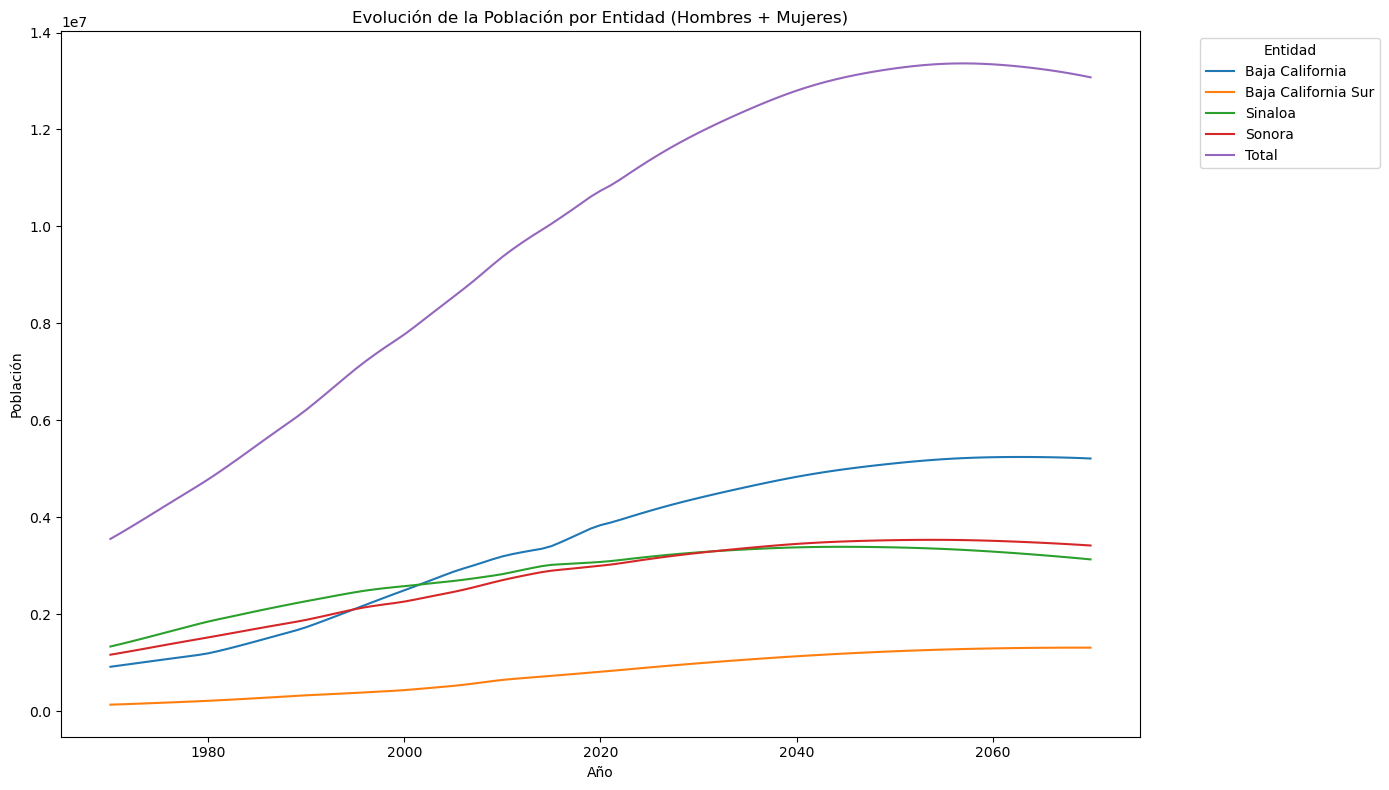

In [33]:
# Cargar el archivo Excel
archivo_excel = 'popze.csv'
df = pd.read_csv(archivo_excel)

# Mostrar las primeras filas para entender la estructura de los datos
df.head()


import matplotlib.pyplot as plt

# Agrupar por año y entidad, sumando la población para obtener el total por entidad cada año
df_agrupado = df.groupby(['AÑO', 'ENTIDAD'])['POBLACION'].sum().reset_index()

# Pivotear el DataFrame para facilitar la graficación: las entidades como columnas y los años como filas
df_pivot = df_agrupado.pivot(index='AÑO', columns='ENTIDAD', values='POBLACION')
df_pivot["Total"]=df_pivot["Baja California"]+df_pivot["Baja California Sur"]+df_pivot["Sinaloa"]+df_pivot["Sonora"]
# Graficar la evolución de la población de cada entidad
plt.figure(figsize=(14, 8))
for entidad in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[entidad], label=entidad)

plt.title('Evolución de la Población por Entidad (Hombres + Mujeres)')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
